In [804]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [805]:
# Chargement des données
achats = pd.read_excel(r'C:\Users\MEDIA TEK\Desktop\achats_commande.xlsx')

In [806]:
# Affichage du nombre de colonnes et de lignes du DataFrame"
achats.shape

(23107, 18)

In [807]:
#Affichage des 5 premiers lignes
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,03/01/2022,2022-01-12 00:00:00,9,25,Conforme,5006997,Société Mohamed,Gafsa
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,04/01/2022,2022-01-20 00:00:00,16,8,Conforme,5005182,Société Gharbi,Nabeul
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,05/01/2022,2022-01-30 00:00:00,25,4,Conforme,5006889,Société Hammami,Tataouine
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,03/01/2022,2022-01-15 00:00:00,12,3,Conforme,5007369,Société Allah,Jendouba
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,04/01/2022,2022-01-10 00:00:00,6,8,Conforme,5005182,Société Gharbi,Gabès


In [808]:
#Affichage des informations du DataFrame
achats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23107 entries, 0 to 23106
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Société             23107 non-null  int64  
 1   N°commande          23107 non-null  int64  
 2   Type commande       23107 non-null  object 
 3   Code article        23107 non-null  object 
 4   Article             23107 non-null  object 
 5   Type article        23107 non-null  object 
 6   Quantité            23107 non-null  float64
 7   UM                  23107 non-null  object 
 8   Montant             23107 non-null  int64  
 9   Centre de cout      23107 non-null  object 
 10  Date commande       23107 non-null  object 
 11  Date réception      23107 non-null  object 
 12  durée de livraion   23107 non-null  int64  
 13  délai de livraison  23107 non-null  int64  
 14  conformité          23107 non-null  object 
 15  Code Fournisseur    23107 non-null  int64  
 16  Nom 

In [809]:
#Affichage des 5 derniéres lignes
achats.tail()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse
23102,5,24900731,OR,HSCLN0015,frais de participation,Service,2.0,PI,1344538,D051008,24/10/2024,31/10/2024,7,25,Conforme,559911,Société Ben Mabrouk,Sidi Bouzid
23103,5,24900731,OR,HSCLN0015,hebergement,Service,2.0,PI,280374,D051008,24/10/2024,31/10/2024,7,25,Conforme,559911,Société Ben Mabrouk,Kasserine
23104,5,24900732,OR,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,873000,D051008,24/10/2024,31/10/2024,7,25,Conforme,559911,Société Ben Mabrouk,Bizerte
23105,5,24900733,OR,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,1000,D051007,24/10/2024,31/10/2024,7,50,Conforme,550645,Société Ben naser,Kasserine
23106,5,922000015,OR,P5611013,COLLIER DE SERRAGE 8/14,Matériel,30.0,PI,19980,PR510,05/01/2022,2022-01-08 00:00:00,3,8,Conforme,5005182,Société Gharbi,Tunis


In [810]:
# Vérification des valeurs manquantes
achats.isnull().sum()

Société               0
N°commande            0
Type commande         0
Code article          0
Article               0
Type article          0
Quantité              0
UM                    0
Montant               0
Centre de cout        0
Date commande         0
Date réception        0
durée de livraion     0
délai de livraison    0
conformité            0
Code Fournisseur      0
Nom Fournisseur       0
adresse               0
dtype: int64

In [811]:
# Vérification des doublons
achats.duplicated().sum()

np.int64(24)

In [812]:
#Suppression des doublons
achats = achats.drop_duplicates()



In [813]:
# Vérification des doublons
achats.duplicated().sum()

np.int64(0)

In [814]:
achats.shape

(23083, 18)

In [815]:
# Conversion des dates en format datetime
achats['Date commande'] = pd.to_datetime(achats['Date commande'], dayfirst=True)
achats['Date réception'] = pd.to_datetime(achats['Date réception'], dayfirst=True)

In [816]:
achats

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,2022-01-03,2022-01-12,9,25,Conforme,5006997,Société Mohamed,Gafsa
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,2022-01-04,2022-01-20,16,8,Conforme,5005182,Société Gharbi,Nabeul
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,2022-01-05,2022-01-30,25,4,Conforme,5006889,Société Hammami,Tataouine
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,2022-01-03,2022-01-15,12,3,Conforme,5007369,Société Allah,Jendouba
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,2022-01-04,2022-01-10,6,8,Conforme,5005182,Société Gharbi,Gabès
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,5,24900731,OR,HSCLN0015,frais de participation,Service,2.0,PI,1344538,D051008,2024-10-24,2024-10-31,7,25,Conforme,559911,Société Ben Mabrouk,Sidi Bouzid
23103,5,24900731,OR,HSCLN0015,hebergement,Service,2.0,PI,280374,D051008,2024-10-24,2024-10-31,7,25,Conforme,559911,Société Ben Mabrouk,Kasserine
23104,5,24900732,OR,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,873000,D051008,2024-10-24,2024-10-31,7,25,Conforme,559911,Société Ben Mabrouk,Bizerte
23105,5,24900733,OR,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,1000,D051007,2024-10-24,2024-10-31,7,50,Conforme,550645,Société Ben naser,Kasserine


In [817]:
# Data Preparation
# Dictionnaire de conversion vers kilogrammes
conversion_factors = {
    'UN': 1,   # Par défaut, 1 unité = 1 kg (à ajuster selon le produit)
    'TN': 1000, # 1 tonne = 1000 kg
    'KG': 1,   # Déjà en kg
    'PC': 1,   # Par défaut, 1 pièce = 1 kg (à ajuster selon le produit)
    'LT': 1,   # Déjà en litre
    'RA': 0.5, # Exemple : 1 rame = 0.5 kg (ajustez selon le poids réel)
    'PI': 1,   # Par défaut, 1 paquet = 1 kg (à ajuster selon le produit)
    'PA': 20,  # Exemple : 1 palette = 20 kg (ajustez selon le poids réel)
    'BT': 0.5, # Exemple : 1 boîte = 0.5 kg (ajustez selon le produit)
    'MI': 1,   # Par défaut, 1 millier = 1 kg (à ajuster selon le produit)
    'MT': 0.5, # Hypothèse : 1 mètre = 0.5 kg (ajustez selon le produit)
    'CT': 5,   # Exemple : 1 carton = 5 kg (ajustez selon le poids réel)
    'PQ': 0.2, # Exemple : 1 paquet = 0.2 kg (ajustez selon le produit)
    'PT': 10,  # Exemple : 1 palette = 10 kg (ajustez selon le poids réel)
    'EA': 1,   # Par défaut, 1 each = 1 kg (à ajuster selon le produit)
    'KT': 5,   # Exemple : 1 kit = 5 kg (ajustez selon le poids réel)
    'RO': 0.1, # Exemple : 1 rôle = 0.1 kg (ajustez selon le produit)
    'GR': 0.001# 1 gramme = 0.001 kg
}

In [818]:
# Fonction de normalisation
def normalize_quantity(row):
    um = row['UM']
    quantity = row['Quantité']
    
    # Appliquer le facteur de conversion si disponible
    if um in conversion_factors:
        return quantity * conversion_factors[um]
    else:
        return None

In [819]:
# Ajout de la colonne Quantité_kg
achats['Quantité_kg'] = achats.apply(normalize_quantity, axis=1)

In [820]:
# Affichage des données après normalisation
achats[['Code article', 'Article ', 'Quantité', 'UM', 'Quantité_kg']].head(20)

,Code article,Article,Quantité,UM,Quantité_kg
0,HSDR0007,SRTJ du E2:E13530/11/2021.,1.00,UN,1.00
1,P6311047,FUEL LOURD N°2,30.00,TN,30000.00
2,M30511105,FILM THERMORÉTRACTABLE NG 40µ,45000.00,KG,45000.00
3,HSDLI007,reparation palettes,3402.00,UN,3402.00
4,P9523007,Glasse de niv Type A N°7 A/JTS,2.00,PC,2.00
5,M21501039,CARTON INTERCALAIRE KRAFT 250G,40000.00,KG,40000.00
6,HSDLI003,"transport beurre""landor""",1.00,UN,1.00
7,HSDT0020,Capteur pression réf1089049252,1.00,UN,1.00
8,M30511034,FILM ETIRABLE TRANSMANUEL L:50,1500.00,KG,1500.00
9,M30511031,FILM ETIRORETRACTABLETRANSPAR,1000.00,KG,1000.00


In [821]:
achats[achats['UM'] == 'MT'].head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg
323,5,22000146,OR,P9912074,TUBE D'AIR TRANSPARENT DIA4X1,Matériel,30.0,MT,361917,PR510,2022-01-28,2022-02-05,8,8,Conforme,5005182,Société Gharbi,Béja,15.0
745,5,22000072,OR,P2122003,TUBE POLYAMIDE BLEU,Matériel,400.0,MT,810000,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Tunis,200.0
746,5,22000072,OR,P2122005,TUBE POLYAMIDE BLEU DIA 08,Matériel,200.0,MT,477000,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Gafsa,100.0
747,5,22000072,OR,P2122006,TUB-POLYAMIDESEMI RIG DIA10X8,Matériel,200.0,MT,378000,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Tunis,100.0
748,5,22000072,OR,P2122009,TUB-POLYAMIDE SEMI RIG DIA 12,Matériel,50.0,MT,314235,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Tataouine,25.0


In [822]:
# Calcul du coût unitaire pour chaque ligne
achats['Coût unitaire'] = achats['Montant'] / achats['Quantité_kg']



In [823]:
#vérification est effectuée pour s'assurer que les divisions par zéro ou les infinies ne se produisent pas
achats['Coût unitaire'] = achats['Coût unitaire'].replace([np.inf, -np.inf], np.nan).fillna(0)  # Gérer les divisions par zéro

In [824]:
# Affichage des résultats
achats[['Code article', 'Article ', 'Quantité', 'UM', 'Quantité_kg', 'Coût unitaire']].head(20)

,Code article,Article,Quantité,UM,Quantité_kg,Coût unitaire
0,HSDR0007,SRTJ du E2:E13530/11/2021.,1.00,UN,1.00,3.081600e+06
1,P6311047,FUEL LOURD N°2,30.00,TN,30000.00,7.425463e+02
2,M30511105,FILM THERMORÉTRACTABLE NG 40µ,45000.00,KG,45000.00,7.800000e+03
3,HSDLI007,reparation palettes,3402.00,UN,3402.00,3.000000e+03
4,P9523007,Glasse de niv Type A N°7 A/JTS,2.00,PC,2.00,1.027400e+06
5,M21501039,CARTON INTERCALAIRE KRAFT 250G,40000.00,KG,40000.00,1.945000e+03
6,HSDLI003,"transport beurre""landor""",1.00,UN,1.00,4.500000e+05
7,HSDT0020,Capteur pression réf1089049252,1.00,UN,1.00,0.000000e+00
8,M30511034,FILM ETIRABLE TRANSMANUEL L:50,1500.00,KG,1500.00,6.200000e+03
9,M30511031,FILM ETIRORETRACTABLETRANSPAR,1000.00,KG,1000.00,7.500000e+03


In [825]:
# Conversion de la colonne "conformité" en valeurs numériques (1 pour "Conforme", 0 pour "Non conforme")
achats['conformité'] = achats['conformité'].apply(lambda x: 1 if x == 'Conforme' else 0)

In [826]:
achats.head(8)

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,2022-01-03,2022-01-12,9,25,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,2022-01-04,2022-01-20,16,8,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,2022-01-05,2022-01-30,25,4,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,2022-01-03,2022-01-15,12,3,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,2022-01-04,2022-01-10,6,8,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06
5,5,22000004,AC,M21501039,CARTON INTERCALAIRE KRAFT 250G,Produit emballage,40000.0,KG,77800000,MP510,2022-01-07,2022-01-31,24,4,1,5007196,Société Ali,Kébili,40000.0,1.945000e+03
6,5,22000004,HS,HSDLI003,"transport beurre""landor""",Service,1.0,UN,450000,D0510055,2022-01-03,2022-01-17,14,3,1,5005954,Société Dridi,Monastir,1.0,4.500000e+05
7,5,22000004,OR,HSDT0020,Capteur pression réf1089049252,Matériel,1.0,UN,0,D0510010,2022-01-04,2022-01-10,6,10,0,550737,Société Cherif,Siliana,1.0,0.000000e+00


In [827]:
# Calcul du nombre total de commandes et du nombre de commandes conformes par fournisseur
conformance_rate = achats.groupby('Code Fournisseur')['conformité'].agg(
    Nombre_commandes_conformes='sum',  # Somme des commandes conformes
    Nombre_total_commandes='count'    # Compte total des commandes
).reset_index()

In [828]:
# Calcul du taux de conformité en pourcentage
conformance_rate['Taux de conformité (%)'] = (
    conformance_rate['Nombre_commandes_conformes'] / 
    conformance_rate['Nombre_total_commandes'] * 
    100
)

In [829]:
# Fusionner le taux de conformité avec le DataFrame principal
achats = achats.merge(conformance_rate[['Code Fournisseur', 'Taux de conformité (%)']], 
                 on='Code Fournisseur', 
                 how='left')

In [830]:
achats[['Code Fournisseur', 'Nom Fournisseur', 'conformité', 'Taux de conformité (%)']].head(20)

,Code Fournisseur,Nom Fournisseur,conformité,Taux de conformité (%)
0,5006997,Société Mohamed,1,100.000000
1,5005182,Société Gharbi,1,72.143532
2,5006889,Société Hammami,1,100.000000
3,5007369,Société Allah,1,100.000000
4,5005182,Société Gharbi,1,72.143532
5,5007196,Société Ali,1,100.000000
6,5005954,Société Dridi,1,100.000000
7,550737,Société Cherif,0,89.845095
8,5005716,Société Ayari,1,100.000000
9,5005716,Société Ayari,1,100.000000


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\1318773309.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(


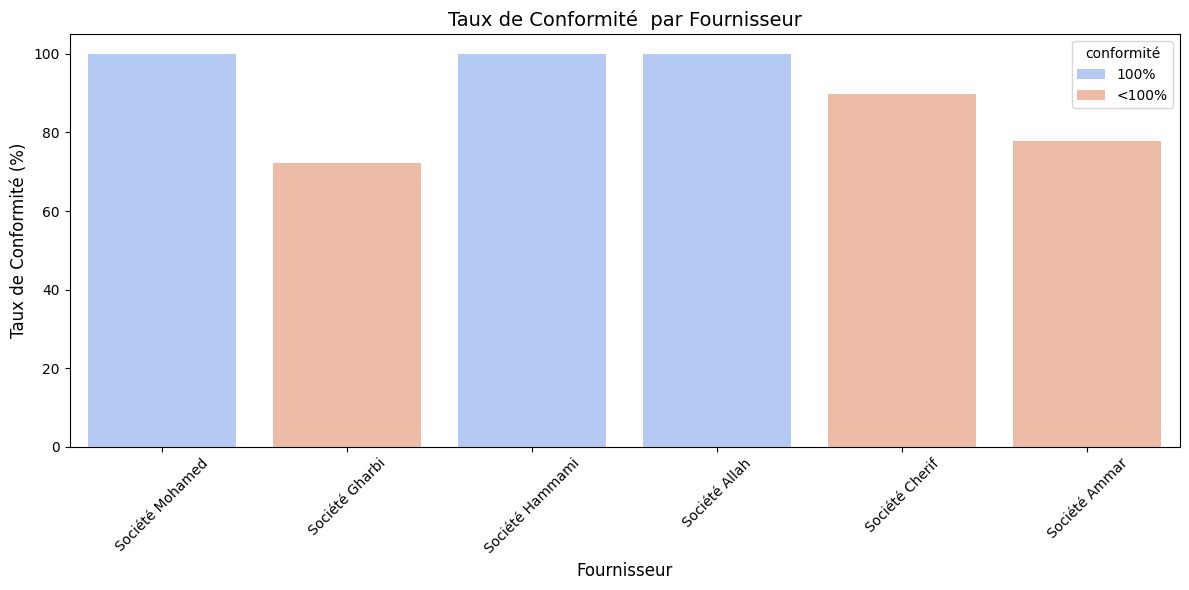

In [831]:
# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de conformité (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformité (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 fournisseurs avec conformité 100% et 3 avec inférieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Créer un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de conformité (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformité  par Fournisseur', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Conformité (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\2691924116.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(


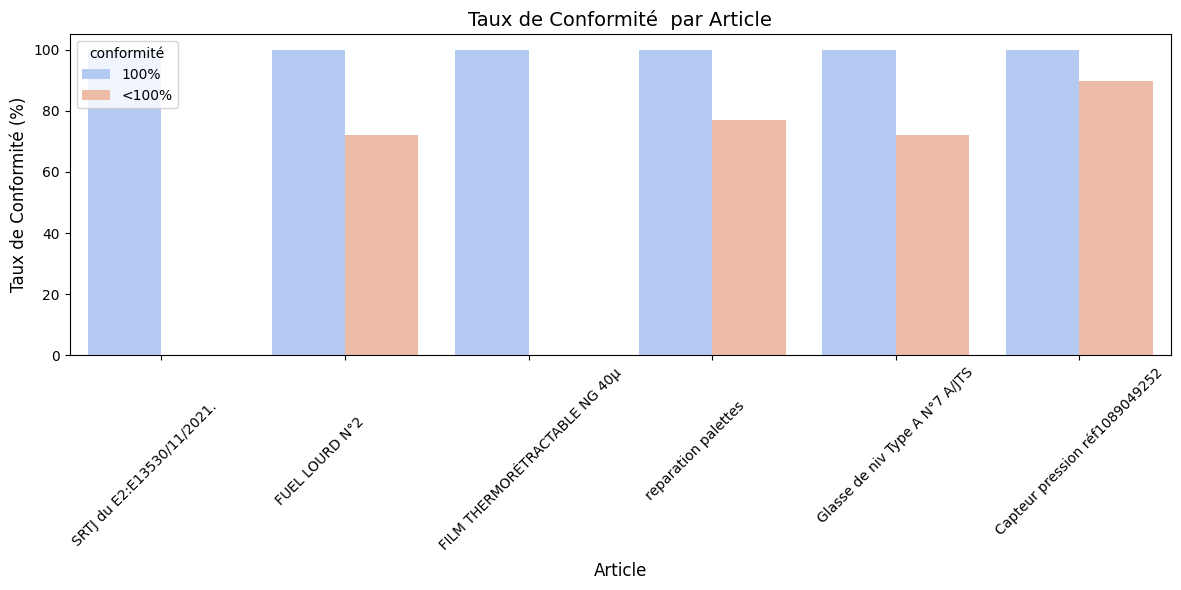

In [832]:

# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de conformité (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformité (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 articles avec conformité 100% et 3 avec inférieur)
articles_100 = conformite_100['Article '].unique()[:3]  # 3 articles avec taux 100%
articles_inferieur = conformite_inferieur['Article '].unique()[:3]  # 3 articles avec taux < 100%

# Créer un sous-ensemble avec ces articles
articles_selectionnes = np.concatenate([articles_100, articles_inferieur])

# Filtrer les données pour ne garder que ces articles
achats_filtrés = achats[achats['Article '].isin(articles_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Article ', y='Taux de conformité (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformité  par Article', fontsize=14)
plt.xlabel('Article', fontsize=12)
plt.ylabel('Taux de Conformité (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()








C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\2915302155.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(


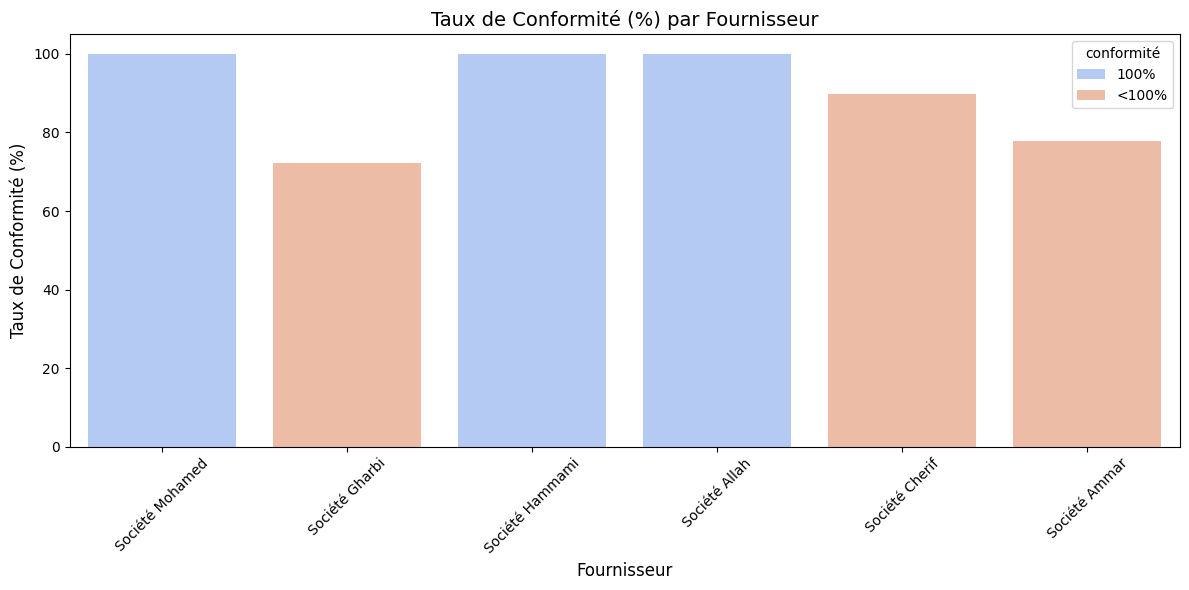

In [833]:

# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de conformité (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformité (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 fournisseurs avec conformité 100% et 3 avec inférieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Créer un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de conformité (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformité (%) par Fournisseur', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Conformité (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


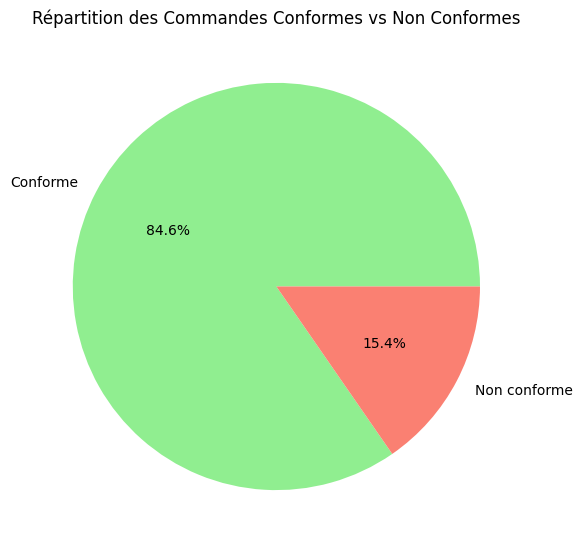

In [834]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['conformité'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=['Conforme', 'Non conforme'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Répartition des Commandes Conformes vs Non Conformes')
plt.tight_layout()
plt.show()

In [835]:
# Calcul de l'écart de délai
achats['Écart de délai'] = achats['durée de livraion'] - achats['délai de livraison']

In [836]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire,Taux de conformité (%),Écart de délai
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,...,9,25,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,16,8,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,25,4,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,12,3,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,6,8,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2


In [837]:
# Créer une nouvelle colonne pour indiquer si le délai est respecté (0 ou positif) ou en retard (négatif)
achats['Statut Livraison'] = np.where(achats['Écart de délai'] > 0, 'Retard', 'Respecté')

In [838]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,...,25,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,8,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,4,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,3,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,8,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté


<Figure size 1200x600 with 0 Axes>

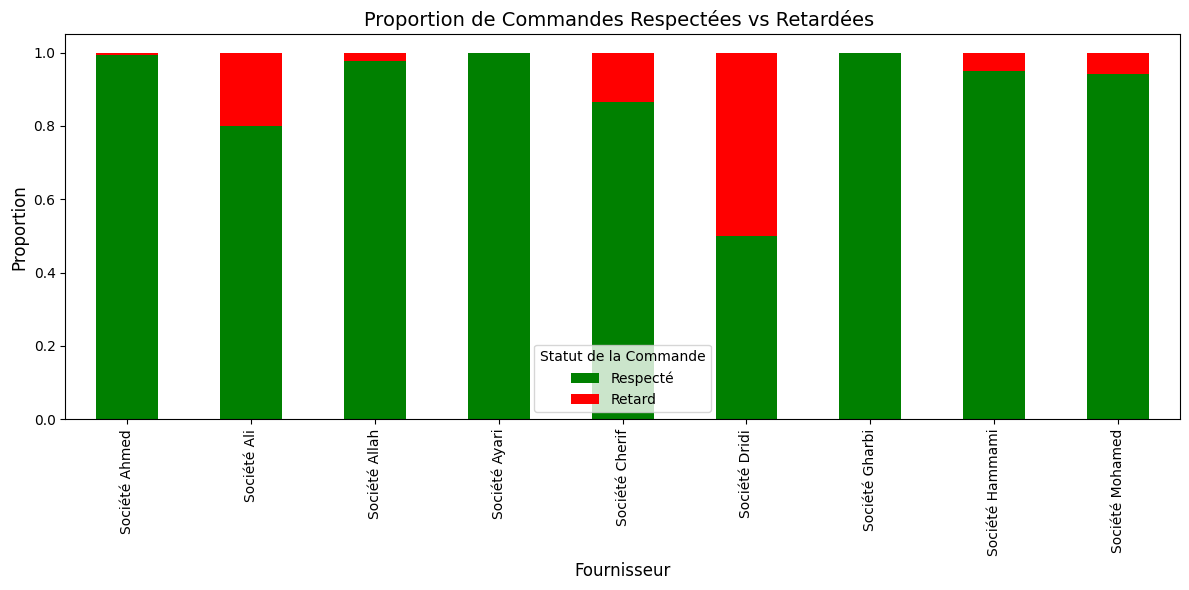

In [839]:


# Sélectionner quelques fournisseurs avec des retards et d'autres respectant les délais
fournisseurs_retard = achats[achats['Statut Livraison'] == 'Retard']['Nom Fournisseur'].unique()[:5]  # Sélectionner 5 fournisseurs en retard
fournisseurs_respecte = achats[achats['Statut Livraison'] == 'Respecté']['Nom Fournisseur'].unique()[:5]  # Sélectionner 5 fournisseurs respectés

# Combiner les deux sous-ensembles de fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_retard, fournisseurs_respecte])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Calculer la proportion de respect / retard par fournisseur
status_proportion = achats_filtrés.groupby(['Nom Fournisseur', 'Statut Livraison']).size().unstack(fill_value=0)
status_proportion = status_proportion.div(status_proportion.sum(axis=1), axis=0)  # Normaliser

# Tracer le graphique à barres empilées
plt.figure(figsize=(12, 6))
status_proportion.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))

# Ajouter un titre et des labels
plt.title('Proportion de Commandes Respectées vs Retardées ', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=90)

# Ajouter une légende
plt.legend(title='Statut de la Commande', labels=['Respecté', 'Retard'])

# Afficher le graphique
plt.tight_layout()
plt.show()



In [840]:
#nombre de commandes par fournisseur
commande_count_by_supplier = achats['Code Fournisseur'].value_counts().reset_index()
commande_count_by_supplier.columns = ['Code Fournisseur', 'Nombre de commandes']

achats = achats.merge(commande_count_by_supplier, on='Code Fournisseur', how='left')

In [841]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison,Nombre de commandes
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,...,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté,17
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard,8472
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard,20
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard,43
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté,8472


In [842]:
# Fusionner les données pour récupérer le Nom Fournisseur
commande_count_by_supplier = pd.merge(commande_count_by_supplier, achats[['Code Fournisseur', 'Nom Fournisseur']].drop_duplicates(), on='Code Fournisseur', how='left')

# Vérifiez que 'Nom Fournisseur' a bien été ajouté
print(commande_count_by_supplier.head())


   Code Fournisseur  Nombre de commandes  Nom Fournisseur
0           5005182                 8472   Société Gharbi
1           5005839                 3229  Société Belhadj
2           5005138                  671     Société Nasr
3            550737                  581   Société Cherif
4           5008737                  410   Société Ayachi


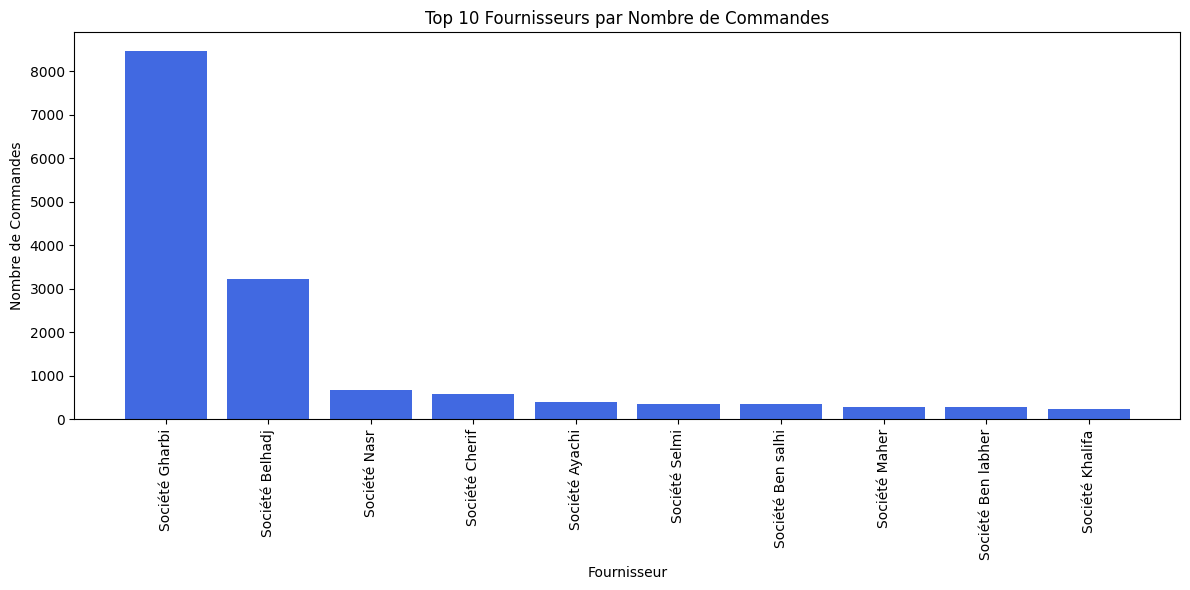

In [843]:
# Sélectionner les 10 principaux fournisseurs
top_suppliers = commande_count_by_supplier.head(10)

# Tracer un diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(top_suppliers['Nom Fournisseur'], top_suppliers['Nombre de commandes'], color='royalblue')
plt.title('Top 10 Fournisseurs par Nombre de Commandes')
plt.xlabel('Fournisseur')
plt.ylabel('Nombre de Commandes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\3327084496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nom Fournisseur', y='Coût unitaire', data=cost_per_unit_by_supplier, palette='viridis')


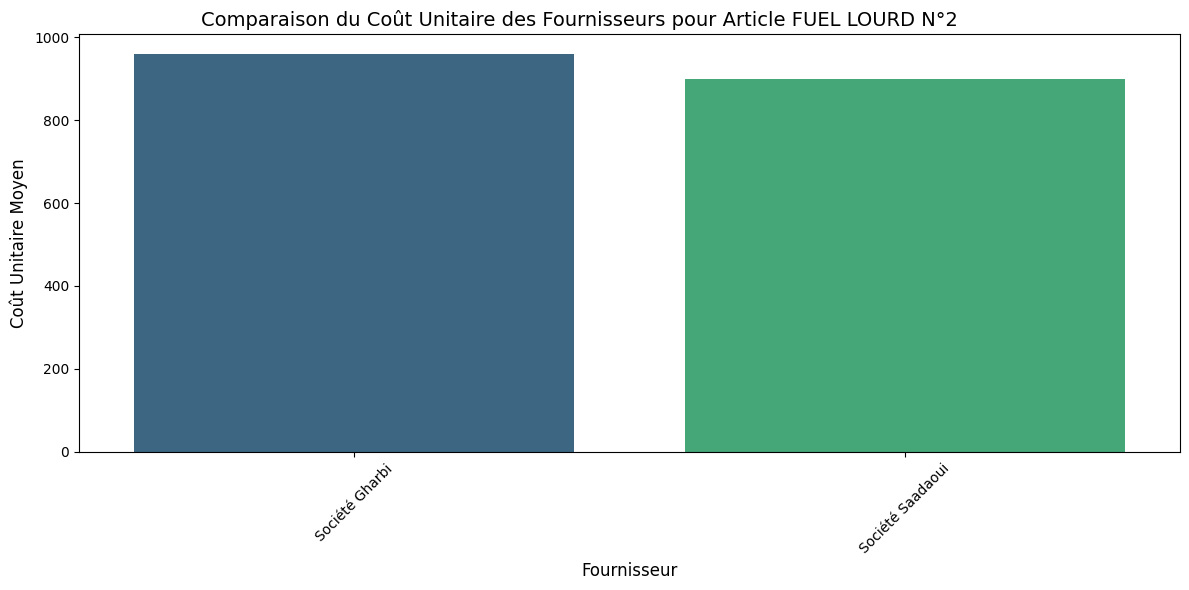

In [844]:
# Sélectionner un article spécifique (par exemple, l'article le plus fréquent)
article_specific = achats['Article '].mode()[0]  # Prend l'article le plus fréquent dans les données

# Filtrer les données pour cet article spécifique
article_data = achats[achats['Article '] == article_specific]

# Calculer le coût unitaire moyen par fournisseur pour cet article
cost_per_unit_by_supplier = article_data.groupby('Nom Fournisseur')['Coût unitaire'].mean().reset_index()

# Tracer un graphique en barres pour comparer les fournisseurs
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Coût unitaire', data=cost_per_unit_by_supplier, palette='viridis')

# Ajouter un titre et des labels
plt.title(f'Comparaison du Coût Unitaire des Fournisseurs pour Article {article_specific}', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Coût Unitaire Moyen', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()







In [845]:
achats.columns

Index(['Société', 'N°commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantité', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date réception', 'durée de livraion',
       'délai de livraison', 'conformité', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'Quantité_kg', 'Coût unitaire',
       'Taux de conformité (%)', 'Écart de délai', 'Statut Livraison',
       'Nombre de commandes'],
      dtype='object')

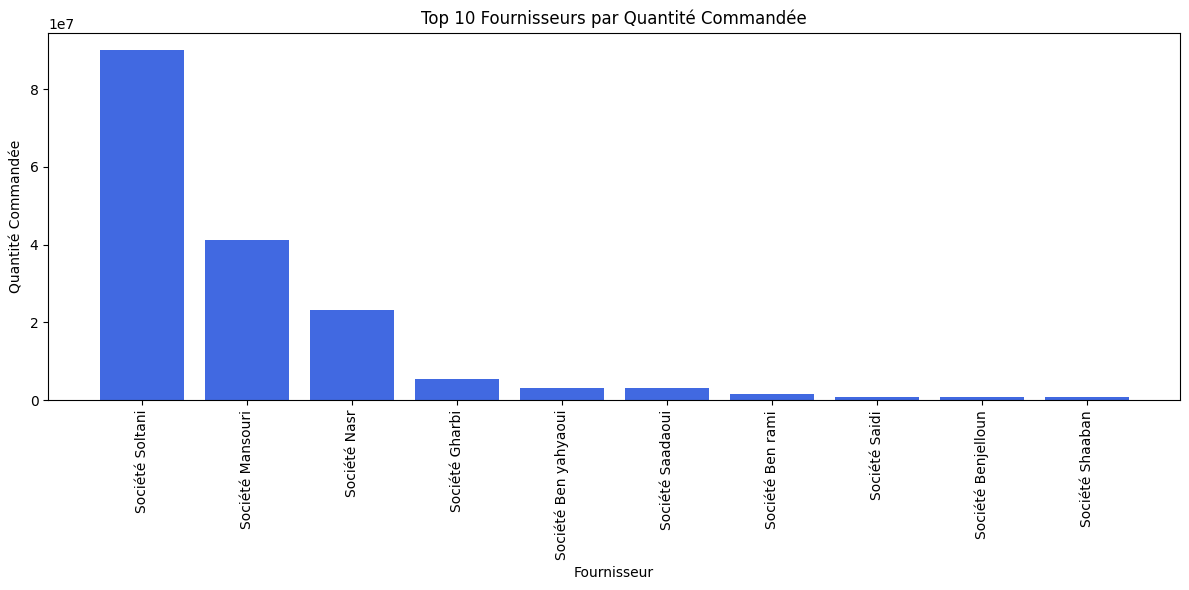

In [846]:
# Sélectionner les 10 principaux fournisseurs par quantité
top_suppliers_quantity = achats.groupby('Nom Fournisseur')['Quantité_kg'].sum().reset_index()
top_suppliers_quantity = top_suppliers_quantity.sort_values(by='Quantité_kg', ascending=False).head(10)

# Tracer un diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(top_suppliers_quantity['Nom Fournisseur'], top_suppliers_quantity['Quantité_kg'], color='royalblue')
plt.title('Top 10 Fournisseurs par Quantité Commandée')
plt.xlabel('Fournisseur')
plt.ylabel('Quantité Commandée')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


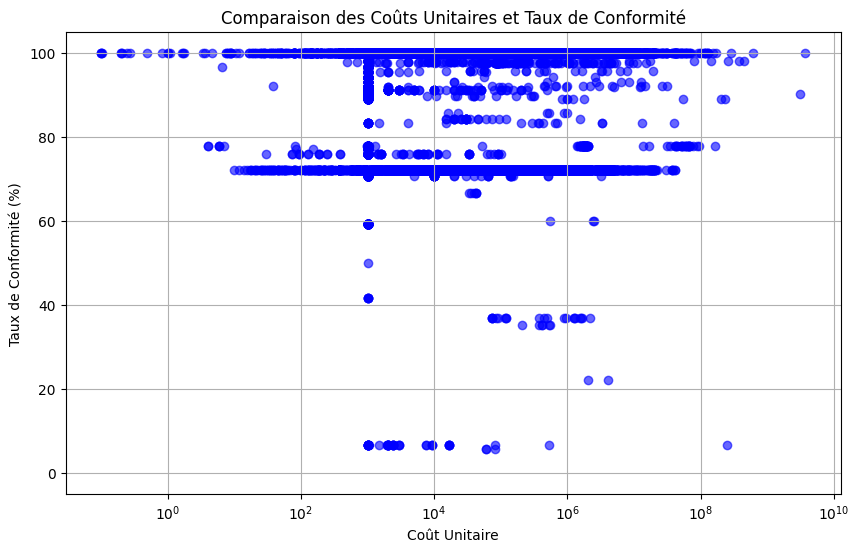

In [847]:
# Tracer un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(achats['Coût unitaire'], achats['Taux de conformité (%)'], alpha=0.6, c='blue')
plt.title('Comparaison des Coûts Unitaires et Taux de Conformité')
plt.xlabel('Coût Unitaire')
plt.ylabel('Taux de Conformité (%)')
plt.xscale('log')  # Échelle logarithmique pour les coûts
plt.grid(True)
plt.show()

In [848]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison,Nombre de commandes
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,...,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté,17
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard,8472
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard,20
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard,43
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté,8472


In [849]:
# Convertir 'Statut Livraison' en valeur numérique
achats['Respect_délais'] = (achats['Statut Livraison'] == 'Respecté').astype(int)

# Vérification rapide
print(achats[['Statut Livraison', 'Respect_délais']].head())

  Statut Livraison  Respect_délais
0         Respecté               1
1           Retard               0
2           Retard               0
3           Retard               0
4         Respecté               1


In [850]:
 # Calcul du Taux de Respect des Délais par fournisseur
taux_respect = achats.groupby('Nom Fournisseur').apply(
    lambda x: (x['Statut Livraison'] == 'Respecté').mean() * 100
).reset_index(name='Taux de Respect (%)')

# Fusionner avec le DataFrame principal (si nécessaire)
achats = achats.merge(taux_respect, on='Nom Fournisseur', how='left')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\1844342875.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taux_respect = achats.groupby('Nom Fournisseur').apply(


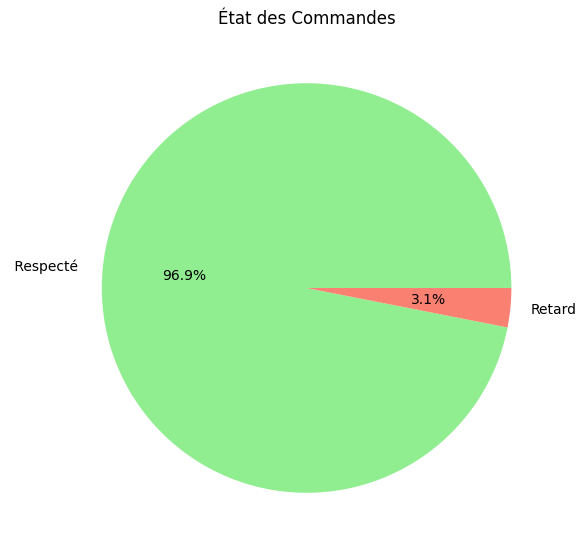

In [851]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['Respect_délais'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=[' Respecté ', 'Retard'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('État des Commandes')
plt.tight_layout()
plt.show()

In [852]:
achats

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison,Nombre de commandes,Respect_délais,Taux de Respect (%)
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,3081600,D051008,...,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté,17,1,94.117647
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard,8472,0,99.940982
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard,20,0,95.000000
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard,43,0,97.674419
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté,8472,1,99.940982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,5,24900731,OR,HSCLN0015,frais de participation,Service,2.0,PI,1344538,D051008,...,Société Ben Mabrouk,Sidi Bouzid,2.0,6.722690e+05,100.000000,-18,Respecté,215,1,100.000000
23079,5,24900731,OR,HSCLN0015,hebergement,Service,2.0,PI,280374,D051008,...,Société Ben Mabrouk,Kasserine,2.0,1.401870e+05,100.000000,-18,Respecté,215,1,100.000000
23080,5,24900732,OR,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,873000,D051008,...,Société Ben Mabrouk,Bizerte,1.0,8.730000e+05,100.000000,-18,Respecté,215,1,100.000000
23081,5,24900733,OR,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,1000,D051007,...,Société Ben naser,Kasserine,1.0,1.000000e+03,100.000000,-43,Respecté,192,1,97.916667


In [853]:
achats.columns

Index(['Société', 'N°commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantité', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date réception', 'durée de livraion',
       'délai de livraison', 'conformité', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'Quantité_kg', 'Coût unitaire',
       'Taux de conformité (%)', 'Écart de délai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_délais', 'Taux de Respect (%)'],
      dtype='object')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_14020\1124144851.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de Respect (%)'].apply(


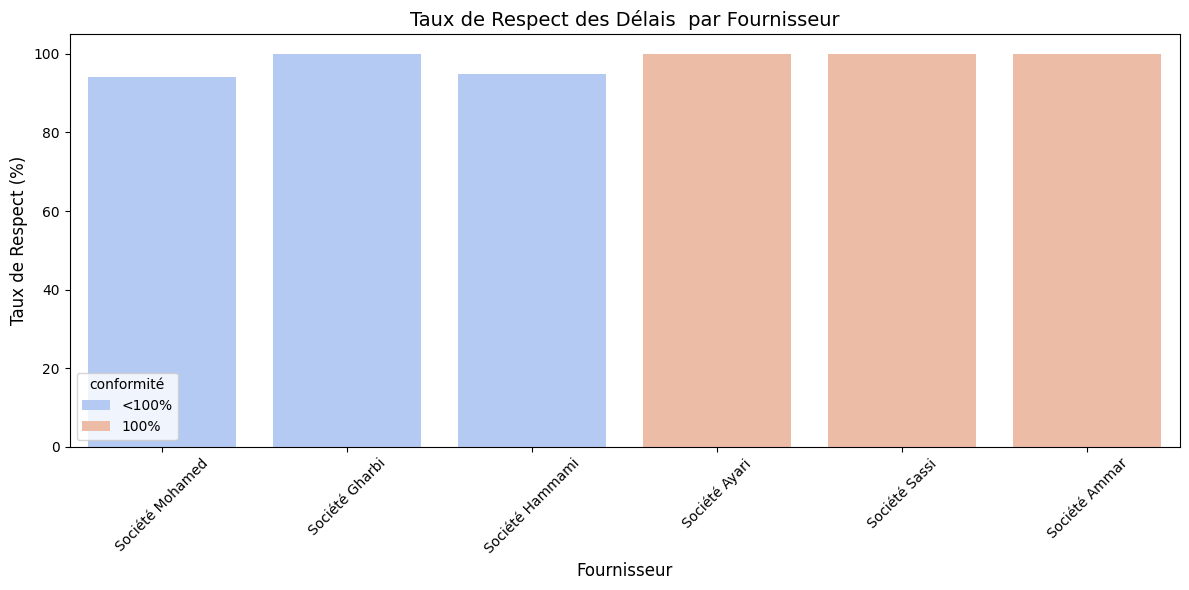

In [854]:
# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de Respect (%)'] == 100]
conformite_inferieur = achats[achats['Taux de Respect (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 fournisseurs avec conformité 100% et 3 avec inférieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Créer un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de Respect (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de Respect (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Respect des Délais  par Fournisseur', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Respect (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [855]:
achats.columns

Index(['Société', 'N°commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantité', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date réception', 'durée de livraion',
       'délai de livraison', 'conformité', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'Quantité_kg', 'Coût unitaire',
       'Taux de conformité (%)', 'Écart de délai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_délais', 'Taux de Respect (%)'],
      dtype='object')

In [856]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Montant', 'délai de livraison',  'Statut Livraison','Écart de délai', 'Société','Centre de cout','Type commande','durée de livraion']

# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

In [857]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,Nom Fournisseur,adresse,Quantité_kg,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%)
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,2022-01-03,2022-01-12,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,17,1,94.117647
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8472,0,99.940982
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,20,0,95.000000
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,43,0,97.674419
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,8472,1,99.940982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,Société Ben Mabrouk,Sidi Bouzid,2.0,6.722690e+05,100.000000,215,1,100.000000
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,Société Ben Mabrouk,Kasserine,2.0,1.401870e+05,100.000000,215,1,100.000000
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,Société Ben Mabrouk,Bizerte,1.0,8.730000e+05,100.000000,215,1,100.000000
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,Société Ben naser,Kasserine,1.0,1.000000e+03,100.000000,192,1,97.916667


In [858]:
# Définition des pondérations (à ajuster selon l'analyse)
w1, w2, w3, w4 = 0.4, 0.3, 0.2, 0.1  

In [859]:
# Normalisation du coût unitaire (éviter division par 0)
achats["Coût unitaire normalisé"] = 1 / (achats["Coût unitaire"] + 1)  # Ajout de +1 pour éviter l'infini
achats["Nombre commandes normalisé"] = achats["Nombre de commandes"] / achats["Nombre de commandes"].max()

In [860]:
# Calcul du score (normalisé entre 0 et 10)
achats["Score"] = 10 * (
    w1 * achats["Taux de conformité (%)"] / 100 +
    w2 * achats["Taux de Respect (%)"] / 100 +
    w3 * achats["Coût unitaire normalisé"] +
    w4 * achats["Nombre commandes normalisé"]
)

In [861]:
# Fonction de catégorisation
def categoriser(score):
    if score >= 8:
        return "Très Fiable"
    elif 5 <= score < 8:
        return "Moyen"
    else:
        return "Risqué"

# Appliquer la catégorisation
achats["Catégorie"] = achats["Score"].apply(categoriser)

# Afficher les résultats
achats[["Nom Fournisseur", "Score", "Catégorie"]].head(9)

,Nom Fournisseur,Score,Catégorie
0,Société Mohamed,6.825537,Moyen
1,Société Gharbi,6.886661,Moyen
2,Société Hammami,6.852617,Moyen
3,Société Allah,6.935975,Moyen
4,Société Gharbi,6.883973,Moyen
5,Société Ali,6.401500,Moyen
6,Société Dridi,5.500241,Moyen
7,Société Cherif,8.254465,Très Fiable
8,Société Ayari,7.001739,Moyen


In [862]:

# Afficher uniquement les fournisseurs "Risqué"
print(achats[achats["Catégorie"] == "Risqué"][["Nom Fournisseur", "Score","Catégorie"]])

            Nom Fournisseur     Score Catégorie
161           Société Saeed  4.322519    Risqué
1207          Société Saeed  4.322519    Risqué
1311          Société Saeed  4.322518    Risqué
1563           Société Amin  4.274074    Risqué
1564           Société Amin  4.274064    Risqué
...                     ...       ...       ...
20801  Société Ben boubaker  4.000119    Risqué
20929  Société Ben Mansouri  4.000119    Risqué
20952   Société Ben mansour  4.000118    Risqué
21573     Société Ben saber  4.000121    Risqué
21575         Société Saeed  4.322540    Risqué

[108 rows x 3 columns]


In [863]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,Quantité_kg,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%),Coût unitaire normalisé,Nombre commandes normalisé,Score,Catégorie
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,1.0,3.081600e+06,100.000000,17,1,94.117647,3.245066e-07,0.002007,6.825537,Moyen
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,...,30000.0,7.425463e+02,72.143532,8472,0,99.940982,1.344906e-03,1.000000,6.886661,Moyen
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,...,45000.0,7.800000e+03,100.000000,20,0,95.000000,1.281887e-04,0.002361,6.852617,Moyen
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,...,3402.0,3.000000e+03,100.000000,43,0,97.674419,3.332223e-04,0.005076,6.935975,Moyen
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,2.0,1.027400e+06,72.143532,8472,1,99.940982,9.733298e-07,1.000000,6.883973,Moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,6.722690e+05,100.000000,215,1,100.000000,1.487498e-06,0.025378,7.025381,Moyen
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,1.401870e+05,100.000000,215,1,100.000000,7.133278e-06,0.025378,7.025392,Moyen
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,1.0,8.730000e+05,100.000000,215,1,100.000000,1.145474e-06,0.025378,7.025380,Moyen
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,...,1.0,1.000000e+03,100.000000,192,1,97.916667,9.990010e-04,0.022663,6.962161,Moyen


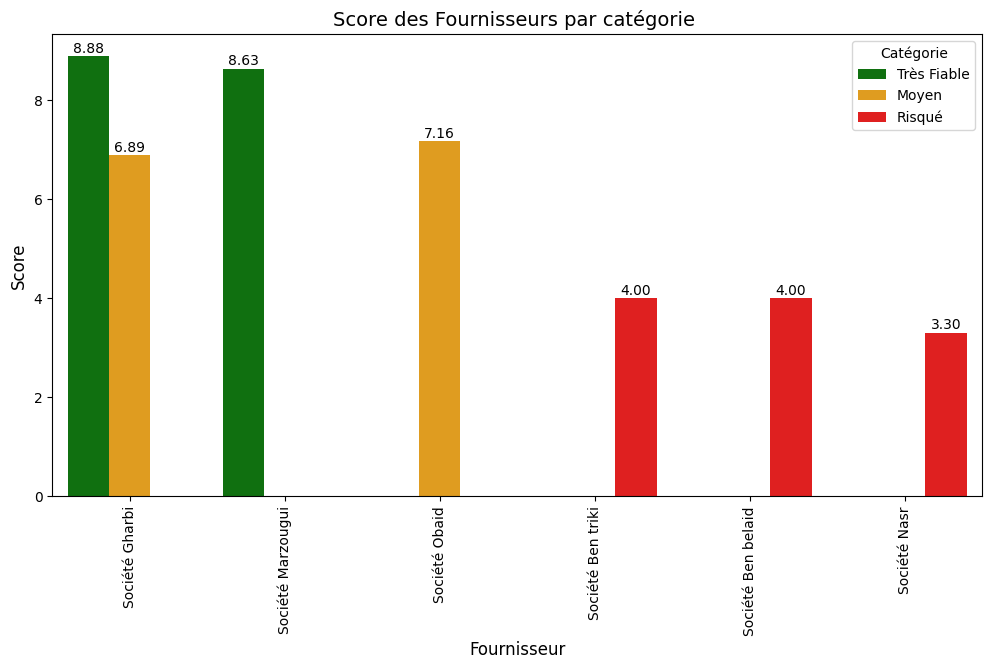

In [864]:
# Sélectionner un sous-ensemble de 3 fournisseurs par catégorie
fournisseurs_tres_fiable = achats[achats['Catégorie'] == 'Très Fiable'].sample(n=3, random_state=1)
fournisseurs_moyen = achats[achats['Catégorie'] == 'Moyen'].sample(n=3, random_state=1)
fournisseurs_risque = achats[achats['Catégorie'] == 'Risqué'].sample(n=3, random_state=1)

# Combiner les sous-ensembles
fournisseurs_selectionnes = pd.concat([fournisseurs_tres_fiable, fournisseurs_moyen, fournisseurs_risque])

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=fournisseurs_selectionnes, 
            x='Nom Fournisseur', 
            y='Score', 
            hue='Catégorie', 
            palette=['green', 'orange', 'red'])  # Utilisation d'une palette pour les 3 catégories

# Ajouter un titre et des labels
plt.title("Score des Fournisseurs par catégorie ", fontsize=14)
plt.xlabel("Fournisseur", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Rotation des étiquettes de l'axe x
plt.xticks(rotation=90)

# Affichage de la légende
plt.legend(title="Catégorie")

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Afficher le graphique
plt.show()


In [865]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,Quantité_kg,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%),Coût unitaire normalisé,Nombre commandes normalisé,Score,Catégorie
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,1.0,3.081600e+06,100.000000,17,1,94.117647,3.245066e-07,0.002007,6.825537,Moyen
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,...,30000.0,7.425463e+02,72.143532,8472,0,99.940982,1.344906e-03,1.000000,6.886661,Moyen
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,...,45000.0,7.800000e+03,100.000000,20,0,95.000000,1.281887e-04,0.002361,6.852617,Moyen
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,...,3402.0,3.000000e+03,100.000000,43,0,97.674419,3.332223e-04,0.005076,6.935975,Moyen
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,2.0,1.027400e+06,72.143532,8472,1,99.940982,9.733298e-07,1.000000,6.883973,Moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,6.722690e+05,100.000000,215,1,100.000000,1.487498e-06,0.025378,7.025381,Moyen
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,1.401870e+05,100.000000,215,1,100.000000,7.133278e-06,0.025378,7.025392,Moyen
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,1.0,8.730000e+05,100.000000,215,1,100.000000,1.145474e-06,0.025378,7.025380,Moyen
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,...,1.0,1.000000e+03,100.000000,192,1,97.916667,9.990010e-04,0.022663,6.962161,Moyen


In [866]:
# Calculer la fréquence par mois
frequence_par_article = achats.groupby('Code article')['Date commande'].count() / achats.groupby('Code article')['Date commande'].apply(lambda x: x.dt.to_period('M').nunique())
achats = achats.merge(frequence_par_article.rename('Fréquence'), on='Code article')



In [867]:
print(frequence_par_article.describe())


count    4237.000000
mean        1.684374
std         1.596553
min         1.000000
25%         1.000000
50%         1.222222
75%         2.000000
max        51.205882
Name: Date commande, dtype: float64


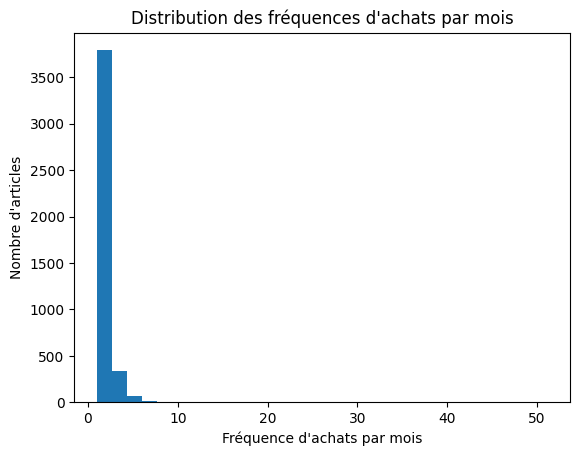

In [868]:
import matplotlib.pyplot as plt

plt.hist(frequence_par_article, bins=30)
plt.title("Distribution des fréquences d'achats par mois")
plt.xlabel("Fréquence d'achats par mois")
plt.ylabel("Nombre d'articles")
plt.show()


In [869]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape pour KMeans
freq_values = achats['Fréquence'].values.reshape(-1, 1)

# 3 clusters : 0, 1, 2
kmeans = KMeans(n_clusters=3, random_state=42)
achats['Horizon_cluster'] = kmeans.fit_predict(freq_values)

# On trie les clusters selon la fréquence moyenne
cluster_means = achats.groupby('Horizon_cluster')['Fréquence'].mean().sort_values()

# Remap : cluster le plus fréquent → Horizon = 1
horizon_map = {old: new for new, old in enumerate(cluster_means.index[::-1], start=1)}
achats['Horizon'] = achats['Horizon_cluster'].map(horizon_map)

# Optionnel : supprimer la colonne intermédiaire
achats.drop(columns='Horizon_cluster', inplace=True)


In [870]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Préparation des données
achats['Date commande'] = pd.to_datetime(achats['Date commande'])
# Extraire le mois, l'année et le trimestre
achats['Mois'] = achats['Date commande'].dt.month
achats['Année'] = achats['Date commande'].dt.year
achats['Trimestre'] = achats['Date commande'].dt.quarter
achats['Jour_semaine'] = achats['Date commande'].dt.dayofweek
# 3. Transformation en sinus et cosinus pour capturer la saisonnalité
achats['Mois_Sin'] = np.sin(2 * np.pi * achats['Mois'] / 12)
achats['Mois_Cos'] = np.cos(2 * np.pi * achats['Mois'] / 12)

# Filtrer les outliers # 4. Elimination des outliers en utilisant l'IQR
Q1 = achats['Quantité'].quantile(0.25)
Q3 = achats['Quantité'].quantile(0.75)
IQR = Q3 - Q1
achats = achats[~((achats['Quantité'] < (Q1 - 1.5 * IQR)) | (achats['Quantité'] > (Q3 + 1.5 * IQR)))]


# Créer 'Article_Fournisseur' 
# 7. Création d'une variable combinée 'Article_Fournisseur' pour l'analyse
achats['Article_Fournisseur'] = achats['Article '] + " - " + achats['Nom Fournisseur']

# Sélectionner les features
features = [
    'Type article', 'Score', 'Taux de conformité (%)', 'Coût unitaire',
    'Nombre de commandes', 'Mois', 'Année', 'Horizon', 'Taux de Respect (%)',
    'Trimestre', 'Jour_semaine', 'Mois_Sin', 'Mois_Cos'
]



# Encoder et préparer les données
X = pd.get_dummies(achats[features], drop_first=True)
y = np.log1p(achats['Quantité'])

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajouter les features moyennes sans fuite de données
achats_train = achats.loc[X_train.index]
achats_test = achats.loc[X_test.index]
X_train['Quantité_Moyenne_Article'] = achats_train.groupby('Code article')['Quantité'].transform('mean')
X_test['Quantité_Moyenne_Article'] = achats_test.groupby('Code article')['Quantité'].transform('mean').reindex(X_test.index, fill_value=achats['Quantité'].mean())
X_train['Quantité_Moyenne_Fournisseur'] = achats_train.groupby('Nom Fournisseur')['Quantité'].transform('mean')
X_test['Quantité_Moyenne_Fournisseur'] = achats_test.groupby('Nom Fournisseur')['Quantité'].transform('mean').reindex(X_test.index, fill_value=achats['Quantité'].mean())

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=20, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)

# Prédictions
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))
y_test_raw = np.expm1(y_test)

# Évaluer
rmse = root_mean_squared_error(y_test_raw, rf_predictions)
mae = mean_absolute_error(y_test_raw, rf_predictions)
r2 = r2_score(y_test_raw, rf_predictions)
print("RMSE :", rmse)
print("MAE :", mae)
print("R² :", r2)

# Afficher les résultats
results = X_test.copy()
results['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results['Quantité_Prédite'] = rf_predictions
results['Quantité_Réelle'] = y_test_raw
results['Erreur_Absolue'] = np.abs(results['Quantité_Prédite'] - results['Quantité_Réelle'])
print(results[['Article_Fournisseur', 'Horizon', 'Quantité_Prédite', 'Quantité_Réelle', 'Erreur_Absolue']])


RMSE : 1.9246600120870918
MAE : 0.7968696175926432
R² : 0.6393405412474389
                                     Article_Fournisseur  Horizon  \
558     Polo Bleu-marine XXXL          - Société Mahmoud        3   
14975    CARTE 90100-0042/90604-2455    - Société Gharbi        3   
22225  thermometre a alcool           - Société Ben l...        2   
8021       réparation chariot cat         - Société Ayad        1   
16094    TIGHTENING NUT 1558918-0000    - Société Gharbi        3   
...                                                  ...      ...   
21481  Spare part kit6-99041638       - Société Ben m...        3   
978      Test d'intégrité échangeur N°1 - Société Cherif        3   
18667   RUDDER STRIP1516243-0000       - Société Belhadj        3   
16224    Element  Accouplement H125     - Société Gharbi        3   
7081     Service kit6-9611923032        - Société Gharbi        3   

       Quantité_Prédite  Quantité_Réelle  Erreur_Absolue  
558            5.958503              

In [871]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,Catégorie,Fréquence,Horizon,Mois,Année,Trimestre,Jour_semaine,Mois_Sin,Mois_Cos,Article_Fournisseur
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,Moyen,25.750000,2,1,2022,1,0,0.500000,0.866025,SRTJ du E2:E13530/11/2021. - Sociét...
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,Moyen,1.000000,3,1,2022,1,1,0.500000,0.866025,Glasse de niv Type A N°7 A/JTS - Société Gharbi
6,22000004,HSDLI003,"transport beurre""landor""",Service,1.0,UN,2022-01-03,2022-01-17,1,5005954,...,Moyen,13.500000,3,1,2022,1,0,0.500000,0.866025,"transport beurre""landor"" - Société Dridi"
7,22000004,HSDT0020,Capteur pression réf1089049252,Matériel,1.0,UN,2022-01-04,2022-01-10,0,550737,...,Très Fiable,14.000000,2,1,2022,1,1,0.500000,0.866025,Capteur pression réf1089049252 - Société Cherif
13,22000043,HSDR0009,FA21/238457,Service,1.0,LT,2022-01-18,2022-01-21,1,5007091,...,Moyen,12.333333,3,1,2022,1,1,0.500000,0.866025,FA21/238457 - Société Ahmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23077,24900730,HSCLN0020,Mission a JORDANIE,Service,3.0,PI,2024-10-24,2024-10-31,1,559911,...,Moyen,2.400000,3,10,2024,4,3,-0.866025,0.500000,Mission a JORDANIE - Société Ben M...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,Moyen,7.307692,3,10,2024,4,3,-0.866025,0.500000,frais de participation - Société Ben M...
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,Moyen,7.307692,3,10,2024,4,3,-0.866025,0.500000,hebergement - Société Ben M...
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,Moyen,2.625000,3,10,2024,4,3,-0.866025,0.500000,Abonnement salle de sport - Société Ben M...


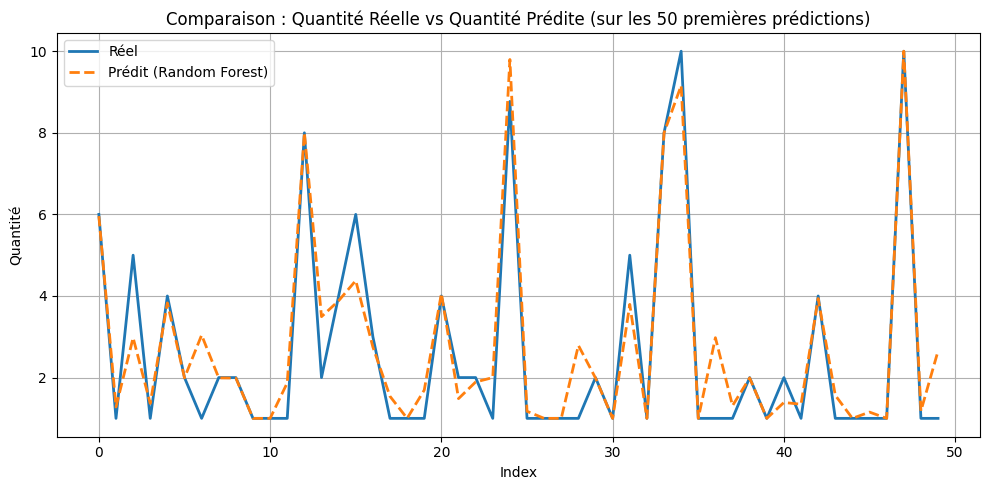

In [872]:
import matplotlib.pyplot as plt

# Suppose que tu as un DataFrame 'results' contenant les colonnes 'Quantité_Réelle' et 'Quantité_Prédite'
results = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],       # valeurs réelles
    'Quantité_Prédite': rf_predictions[:50]   # valeurs prédites
})

plt.figure(figsize=(10, 5))
plt.plot(results['Quantité_Réelle'].values, label='Réel', linewidth=2)
plt.plot(results['Quantité_Prédite'].values, label='Prédit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantité Réelle vs Quantité Prédite (sur les 50 premières prédictions)')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [873]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [874]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Meilleurs paramètres trouvés par GridSearchCV
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 100
}

# Entraînement avec XGBoost
xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entraînement du modèle
xgb_model.fit(X_train_scaled, y_train)

# Prédictions
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))

# Évaluation des performances
xgb_rmse = np.sqrt(((y_test_raw - xgb_predictions) ** 2).mean())
xgb_mae = mean_absolute_error(y_test_raw, xgb_predictions)
xgb_r2 = r2_score(y_test_raw, xgb_predictions)

print("\n🔹 [XGBoost] Résultats de performance :")
print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)
print("R² :", xgb_r2)

# Résultats XGBoost
results_xgb = X_test.copy()
results_xgb['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_xgb['Quantité_Prédite'] = xgb_predictions
results_xgb['Quantité_Réelle'] = y_test_raw
results_xgb['Erreur_Absolue'] = np.abs(results_xgb['Quantité_Prédite'] - results_xgb['Quantité_Réelle'])

print("\nExtrait des résultats XGBoost :")
print(results_xgb[['Article_Fournisseur', 'Horizon', 'Quantité_Prédite', 'Quantité_Réelle', 'Erreur_Absolue']].head())




🔹 [XGBoost] Résultats de performance :
RMSE : 1.8650821301501281
MAE : 0.8124999196081886
R² : 0.6613233914624073

Extrait des résultats XGBoost :
                                     Article_Fournisseur  Horizon  \
558     Polo Bleu-marine XXXL          - Société Mahmoud        3   
14975    CARTE 90100-0042/90604-2455    - Société Gharbi        3   
22225  thermometre a alcool           - Société Ben l...        2   
8021       réparation chariot cat         - Société Ayad        1   
16094    TIGHTENING NUT 1558918-0000    - Société Gharbi        3   

       Quantité_Prédite  Quantité_Réelle  Erreur_Absolue  
558            5.330945              6.0        0.669055  
14975          1.273320              1.0        0.273320  
22225          2.914958              5.0        2.085042  
8021           1.520190              1.0        0.520190  
16094          4.013211              4.0        0.013211  


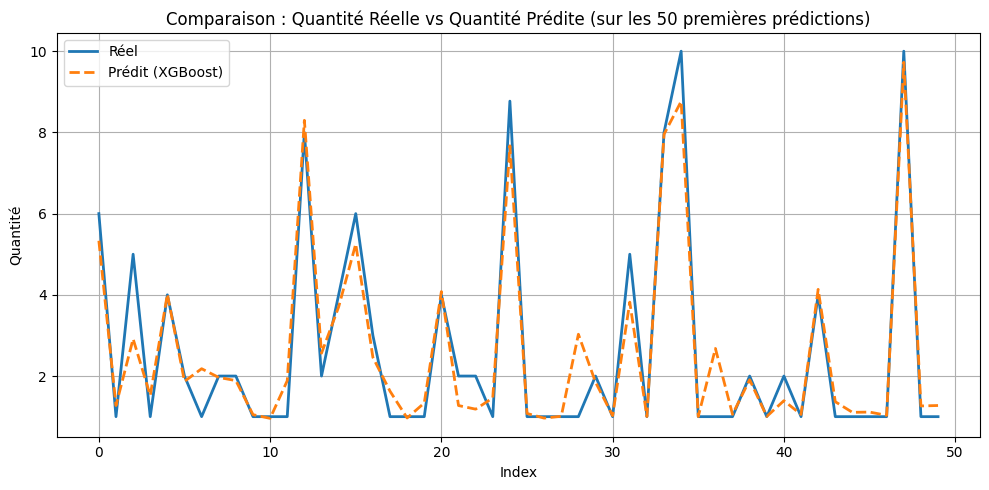

In [876]:
import matplotlib.pyplot as plt
import pandas as pd

# Suppose que tu as un DataFrame 'results_xgb' contenant les colonnes 'Quantité_Réelle' et 'Quantité_Prédite'
results_xgb = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],       # valeurs réelles
    'Quantité_Prédite': xgb_predictions[:50]  # valeurs prédites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_xgb['Quantité_Réelle'].values, label='Réel', linewidth=2)
plt.plot(results_xgb['Quantité_Prédite'].values, label='Prédit (XGBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantité Réelle vs Quantité Prédite (sur les 50 premières prédictions)')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [877]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Entraînement avec CatBoost
catboost_model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bylevel=0.8,
    random_state=42,
    silent=True  # Désactive les logs pendant l'entraînement
)

# Entraîner le modèle
catboost_model.fit(X_train_scaled, y_train)

# Prédictions
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))

# Évaluation des performances
catboost_rmse = np.sqrt(mean_squared_error(y_test_raw, catboost_predictions))
catboost_mae = mean_absolute_error(y_test_raw, catboost_predictions)
catboost_r2 = r2_score(y_test_raw, catboost_predictions)

print("\n🔹 [CatBoost] Résultats de performance :")
print("RMSE :", catboost_rmse)
print("MAE :", catboost_mae)
print("R² :", catboost_r2)

# Résultats CatBoost
results_catboost = X_test.copy()
results_catboost['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_catboost['Quantité_Prédite'] = catboost_predictions
results_catboost['Quantité_Réelle'] = y_test_raw
results_catboost['Erreur_Absolue'] = np.abs(results_catboost['Quantité_Prédite'] - results_catboost['Quantité_Réelle'])

print("\nExtrait des résultats CatBoost :")
results_catboost[['Article_Fournisseur', 'Horizon', 'Quantité_Prédite', 'Quantité_Réelle', 'Erreur_Absolue']].head()



🔹 [CatBoost] Résultats de performance :
RMSE : 1.8494211578011435
MAE : 0.7934577133453996
R² : 0.6669872024282323

Extrait des résultats CatBoost :


,Article_Fournisseur,Horizon,Quantité_Prédite,Quantité_Réelle,Erreur_Absolue
558,Polo Bleu-marine XXXL - Société Mahmoud,3,5.195955,6.0,0.804045
14975,CARTE 90100-0042/90604-2455 - Société Gharbi,3,1.319990,1.0,0.319990
22225,thermometre a alcool - Société Ben l...,2,2.652672,5.0,2.347328
8021,réparation chariot cat - Société Ayad,1,1.140769,1.0,0.140769
16094,TIGHTENING NUT 1558918-0000 - Société Gharbi,3,4.163520,4.0,0.163520


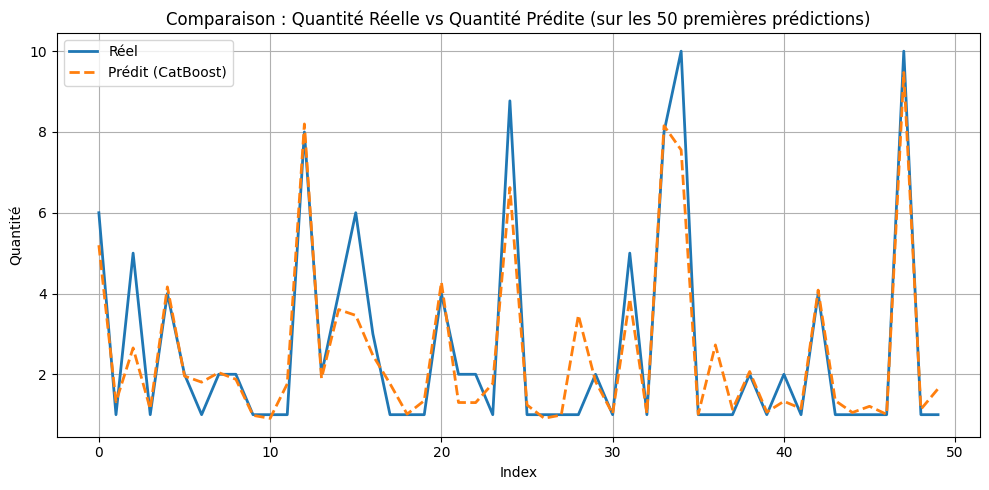

In [878]:
# Visualisation des résultats
results_catboost_viz = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],       # valeurs réelles
    'Quantité_Prédite': catboost_predictions[:50]  # valeurs prédites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_catboost_viz['Quantité_Réelle'].values, label='Réel', linewidth=2)
plt.plot(results_catboost_viz['Quantité_Prédite'].values, label='Prédit (CatBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantité Réelle vs Quantité Prédite (sur les 50 premières prédictions)')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 [Random Forest] Résultats de performance :
RMSE : 1.9246600120870918
MAE : 0.7968696175926432
R² : 0.6393405412474389

🔹 [XGBoost] Résultats de performance :
RMSE : 1.8650821301501281
MAE : 0.8124999196081886
R² : 0.6613233914624073

🔹 [CatBoost] Résultats de performance :
RMSE : 1.8494211578011435
MAE : 0.7934577133453996
R² : 0.6669872024282323


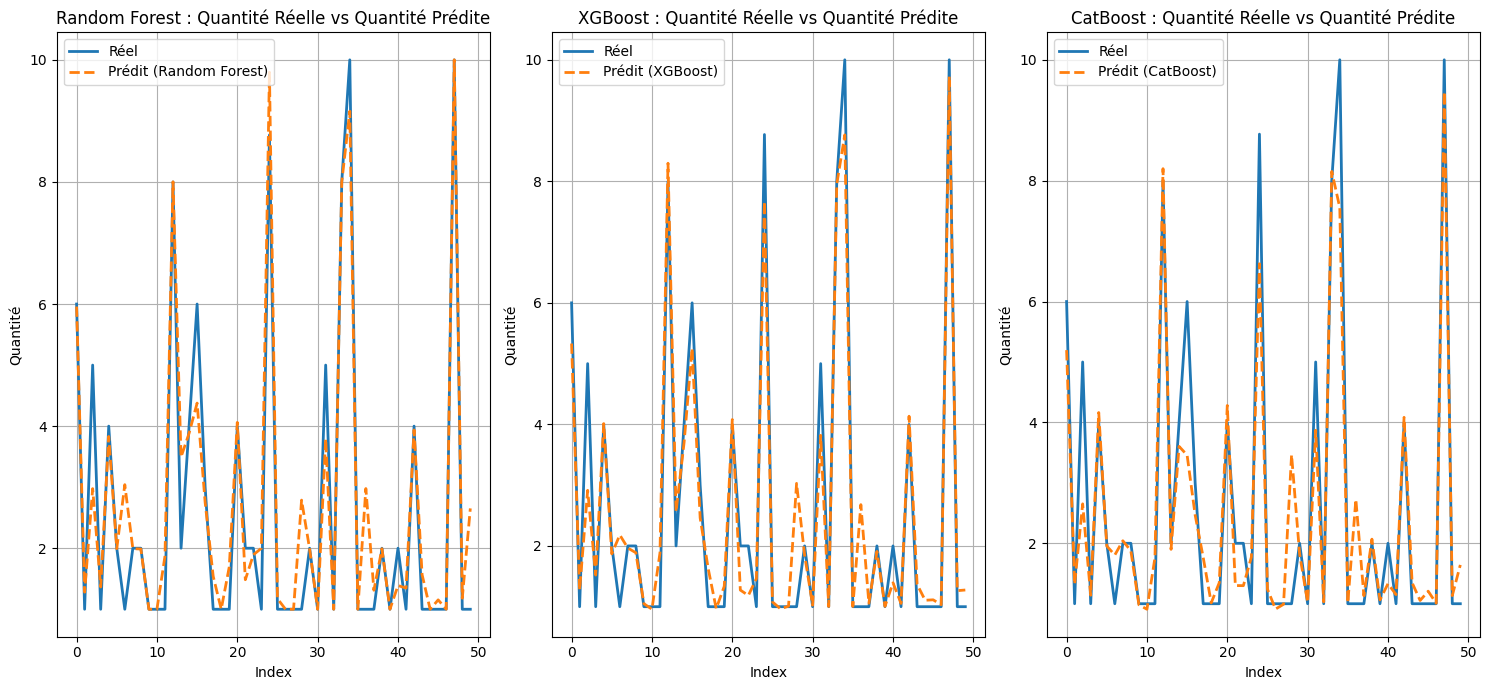


🔹 Résumé des métriques pour chaque modèle :
           Model      RMSE       MAE        R²
0  Random Forest  1.924660  0.796870  0.639341
1        XGBoost  1.865082  0.812500  0.661323
2       CatBoost  1.849421  0.793458  0.666987


In [879]:
# Prédictions de chaque modèle (en supposant que tu as déjà XGBoost, Random Forest et CatBoost entraînés)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des métriques pour chaque modèle
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 [{model_name}] Résultats de performance :")
    print("RMSE :", rmse)
    print("MAE :", mae)
    print("R² :", r2)
    return rmse, mae, r2

# Affichage des résultats de chaque modèle
rf_rmse, rf_mae, rf_r2 = print_metrics(y_test_raw, rf_predictions, "Random Forest")
xgb_rmse, xgb_mae, xgb_r2 = print_metrics(y_test_raw, xgb_predictions, "XGBoost")
catboost_rmse, catboost_mae, catboost_r2 = print_metrics(y_test_raw, catboost_predictions, "CatBoost")

# Comparaison visuelle des prédictions des trois modèles
plt.figure(figsize=(15, 7))

# Graphiques pour comparer les trois modèles (50 premières prédictions)
plt.subplot(1, 3, 1)
plt.plot(y_test_raw[:50].values, label='Réel', linewidth=2)
plt.plot(rf_predictions[:50], label='Prédit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Random Forest : Quantité Réelle vs Quantité Prédite')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(y_test_raw[:50].values, label='Réel', linewidth=2)
plt.plot(xgb_predictions[:50], label='Prédit (XGBoost)', linestyle='--', linewidth=2)
plt.title('XGBoost : Quantité Réelle vs Quantité Prédite')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(y_test_raw[:50].values, label='Réel', linewidth=2)
plt.plot(catboost_predictions[:50], label='Prédit (CatBoost)', linestyle='--', linewidth=2)
plt.title('CatBoost : Quantité Réelle vs Quantité Prédite')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Résumé des métriques pour comparaison
print("\n🔹 Résumé des métriques pour chaque modèle :")
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'CatBoost'],
    'RMSE': [rf_rmse, xgb_rmse, catboost_rmse],
    'MAE': [rf_mae, xgb_mae, catboost_mae],
    'R²': [rf_r2, xgb_r2, catboost_r2]
})

print(comparison_df)


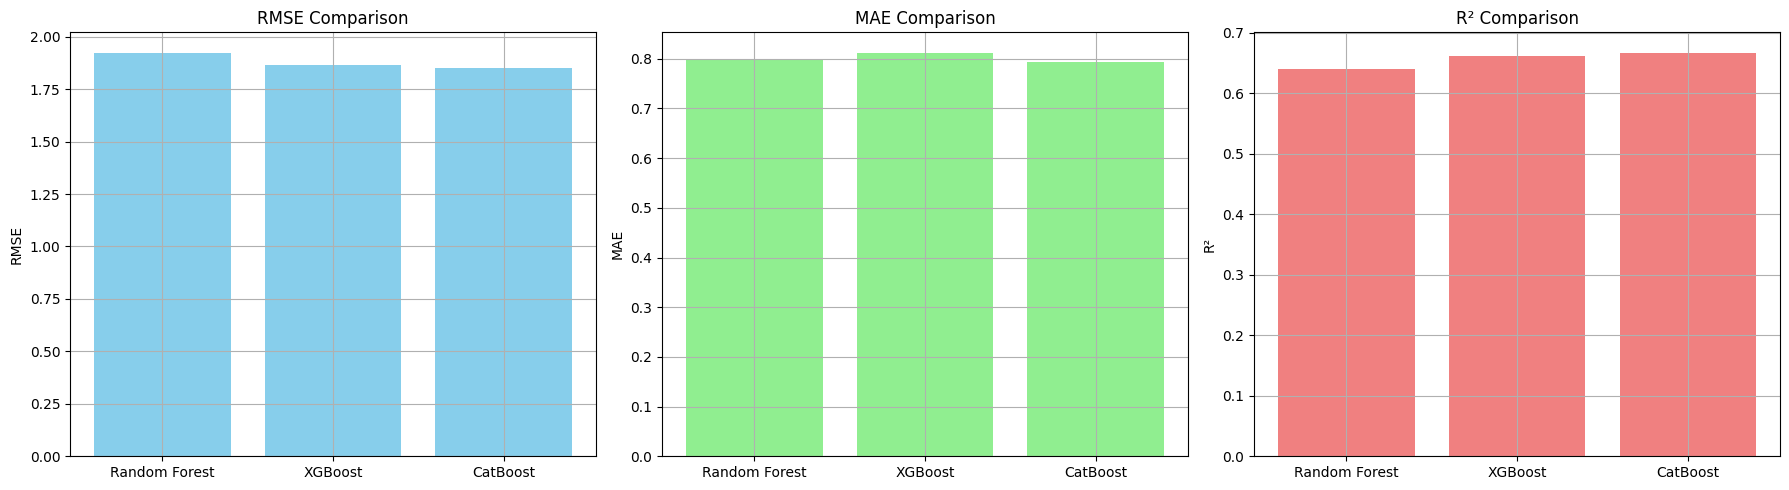

In [880]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions des trois modèles (en supposant qu'elles sont déjà calculées)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des métriques pour chaque modèle
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Métriques pour chaque modèle
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Comparaison visuelle des résultats
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Création de la figure
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# RMSE - Comparaison des modèles
ax[0].bar(models, rmse_values, color='skyblue')
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# MAE - Comparaison des modèles
ax[1].bar(models, mae_values, color='lightgreen')
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE')
ax[1].grid(True)

# R² - Comparaison des modèles
ax[2].bar(models, r2_values, color='lightcoral')
ax[2].set_title('R² Comparison')
ax[2].set_ylabel('R²')
ax[2].grid(True)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


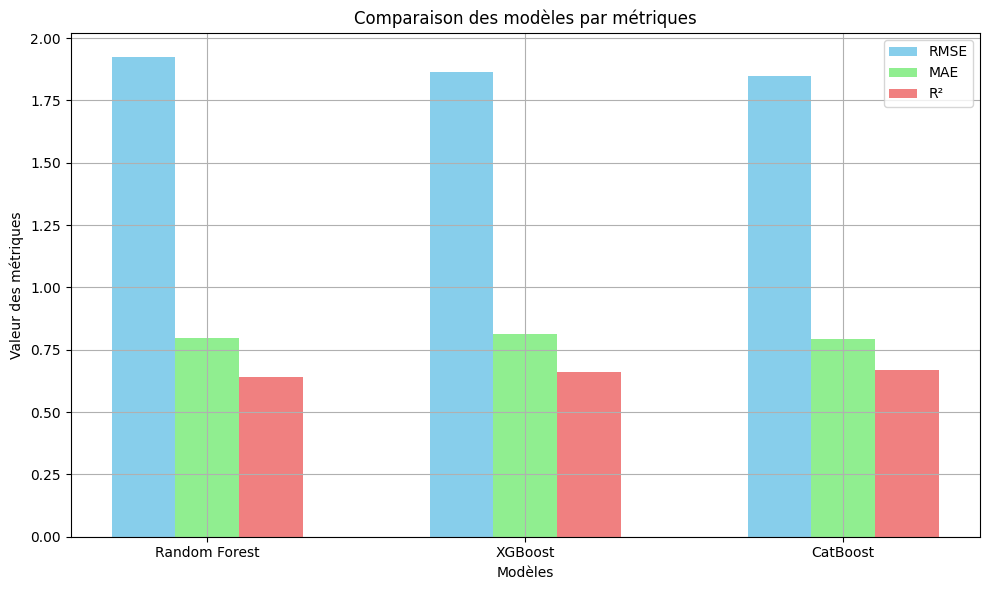

In [881]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions des trois modèles (en supposant qu'elles sont déjà calculées)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des métriques pour chaque modèle
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Métriques pour chaque modèle
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Modèles et leurs métriques
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Position des barres pour chaque métrique
x = np.arange(len(models))  # La position des modèles
width = 0.2  # Largeur des barres

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour RMSE, MAE et R²
bar1 = ax.bar(x - width, rmse_values, width, label='RMSE', color='skyblue')
bar2 = ax.bar(x, mae_values, width, label='MAE', color='lightgreen')
bar3 = ax.bar(x + width, r2_values, width, label='R²', color='lightcoral')

# Ajout des étiquettes et titre
ax.set_xlabel('Modèles')
ax.set_ylabel('Valeur des métriques')
ax.set_title('Comparaison des modèles par métriques')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage de la grille
ax.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()


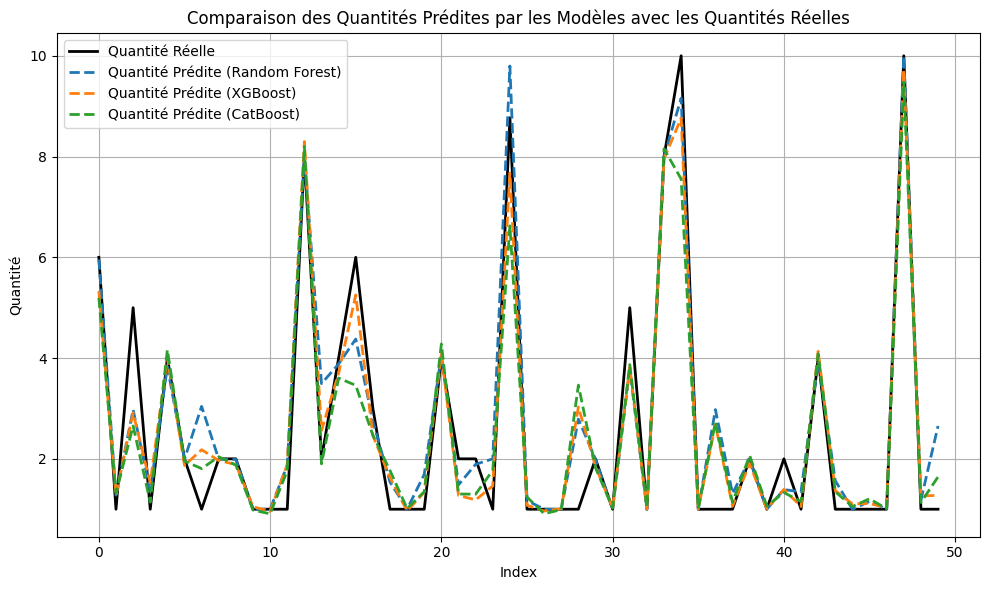

In [882]:
import matplotlib.pyplot as plt

# Crée un DataFrame avec les quantités réelles et prédites pour chaque modèle
results_comparison = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],  # Quantité réelle (sélectionner les 50 premières valeurs pour l'affichage)
    'Quantité_Predite_RF': rf_predictions[:50],  # Quantité prédite par Random Forest
    'Quantité_Predite_XGB': xgb_predictions[:50],  # Quantité prédite par XGBoost
    'Quantité_Predite_CB': catboost_predictions[:50]  # Quantité prédite par CatBoost
})

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes
plt.plot(results_comparison['Quantité_Réelle'].values, label='Quantité Réelle', color='black', linewidth=2)
plt.plot(results_comparison['Quantité_Predite_RF'].values, label='Quantité Prédite (Random Forest)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantité_Predite_XGB'].values, label='Quantité Prédite (XGBoost)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantité_Predite_CB'].values, label='Quantité Prédite (CatBoost)', linestyle='--', linewidth=2)

# Ajouter un titre et des labels
plt.title('Comparaison des Quantités Prédites par les Modèles avec les Quantités Réelles')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()

# Ajouter une grille pour une meilleure visibilité
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [883]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Mois_Cos','Mois_Sin','Jour_semaine','Trimestre','Horizon', 'Fréquence', 'Article_Fournisseur','Coût unitaire normalisé','Quantité_kg','Nombre commandes normalisé']
# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

In [884]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,adresse,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%),Score,Catégorie,Mois,Année
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Service,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,Gafsa,3081600.0,100.000000,17,1,94.117647,6.825537,Moyen,1,2022
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,Gabès,1027400.0,72.143532,8472,1,99.940982,6.883973,Moyen,1,2022
6,22000004,HSDLI003,"transport beurre""landor""",Service,1.0,UN,2022-01-03,2022-01-17,1,5005954,...,Monastir,450000.0,100.000000,2,0,50.000000,5.500241,Moyen,1,2022
7,22000004,HSDT0020,Capteur pression réf1089049252,Matériel,1.0,UN,2022-01-04,2022-01-10,0,550737,...,Siliana,0.0,89.845095,581,1,86.402754,8.254465,Très Fiable,1,2022
13,22000043,HSDR0009,FA21/238457,Service,1.0,LT,2022-01-18,2022-01-21,1,5007091,...,Kairouan,74374.0,100.000000,178,1,99.438202,7.004183,Moyen,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23077,24900730,HSCLN0020,Mission a JORDANIE,Service,3.0,PI,2024-10-24,2024-10-31,1,559911,...,Kairouan,1998350.0,100.000000,215,1,100.000000,7.025379,Moyen,10,2024
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,Sidi Bouzid,672269.0,100.000000,215,1,100.000000,7.025381,Moyen,10,2024
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,Kasserine,140187.0,100.000000,215,1,100.000000,7.025392,Moyen,10,2024
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,Bizerte,873000.0,100.000000,215,1,100.000000,7.025380,Moyen,10,2024


In [885]:
import joblib

# Sauvegarde du modèle localement
joblib.dump(catboost_model, "catboost_model.pkl")
print("✅ Modèle sauvegardé localement sous 'catboost_model.pkl'")
#💾 Sauvegarde des résultats dans un fichier CSV
results_catboost.to_csv("resultats_catboost.csv", index=False)
print("✅ Résultats sauvegardés dans 'resultats_catboost.csv'")

✅ Modèle sauvegardé localement sous 'catboost_model.pkl'
✅ Résultats sauvegardés dans 'resultats_catboost.csv'


In [886]:
# Sauvegarde du DataFrame dans un fichier CSV
achats.to_csv("dataframe_achats.csv", index=False)



print("✅ DataFrame sauvegardé dans 'dataframe_achats.csv'")



✅ DataFrame sauvegardé dans 'dataframe_achats.csv'
